<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [1]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [2]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl
# closes = web.YahooDailyReader(ticker, start_date, end_date).read().sort_index('major_axis')

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-11-16,2.5,call,AAPL181116C00002500,...,2018-10-29 20:00:01,2018-10-25 19:59:59,"{'contractSymbol': 'AAPL181116C00002500', 'str..."
2019-01-18,2.5,call,AAPL190118C00002500,...,2018-10-29 20:00:01,2018-10-15 19:47:03,"{'contractSymbol': 'AAPL190118C00002500', 'str..."
2019-04-18,2.5,call,AAPL190418C00002500,...,2018-10-29 20:00:01,2018-10-16 18:42:10,"{'contractSymbol': 'AAPL190418C00002500', 'str..."
2018-11-16,5.0,call,AAPL181116C00005000,...,2018-10-29 20:00:01,2018-10-16 18:40:53,"{'contractSymbol': 'AAPL181116C00005000', 'str..."
2019-01-18,5.0,call,AAPL190118C00005000,...,2018-10-29 20:00:01,2018-09-08 03:58:48,"{'contractSymbol': 'AAPL190118C00005000', 'str..."
...,...,...,...,...,...,...,...
2019-04-18,410.0,call,AAPL190418C00410000,...,2018-10-29 20:00:01,2018-10-18 15:46:39,"{'contractSymbol': 'AAPL190418C00410000', 'str..."
2019-04-18,420.0,call,AAPL190418C00420000,...,2018-10-29 20:00:01,2018-10-26 14:59:37,"{'contractSymbol': 'AAPL190418C00420000', 'str..."
2019-04-18,425.0,call,AAPL190418C00425000,...,2018-10-29 20:00:01,2018-10-26 18:21:59,"{'contractSymbol': 'AAPL190418C00425000', 'str..."


In [3]:
# aapl_opt.loc[0, 'JSON']
aapl_opt.loc[200, 'JSON']

{'contractSymbol': 'AAPL181221P00135000',
 'strike': 135.0,
 'currency': 'USD',
 'lastPrice': 0.13,
 'change': -0.060000002,
 'percentChange': -31.578949,
 'volume': 101,
 'openInterest': 1043,
 'bid': 0.19,
 'ask': 0.4,
 'contractSize': 'REGULAR',
 'expiration': 1545350400,
 'lastTradeDate': 1540824706,
 'impliedVolatility': 0.5795940478515625,
 'inTheMoney': False}

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [4]:
aapl_opt.loc[:, 'Type']

0       call
1       call
2       call
3       call
4       call
        ... 
1051    call
1052    call
1053    call
1054     put
1055    call
Name: Type, Length: 1056, dtype: object

o en que fecha expiran

In [5]:
aapl_opt.loc[:, 'Expiry']

0      2018-11-16
1      2019-01-18
2      2019-04-18
3      2018-11-16
4      2019-01-18
          ...    
1051   2019-04-18
1052   2019-04-18
1053   2019-04-18
1054   2019-04-18
1055   2018-11-16
Name: Expiry, Length: 1056, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2019-04-18)

In [6]:
call06 = aapl_opt.loc[(aapl_opt.Expiry=='2019-04-18') & (aapl_opt.Type=='call')]
call06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
2,2.5,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-16 18:42:10,"{'contractSymbol': 'AAPL190418C00002500', 'str..."
32,60.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-16 18:42:17,"{'contractSymbol': 'AAPL190418C00060000', 'str..."
37,65.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-16 18:42:17,"{'contractSymbol': 'AAPL190418C00065000', 'str..."
81,95.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-16 18:42:18,"{'contractSymbol': 'AAPL190418C00095000', 'str..."
97,100.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-08 15:25:47,"{'contractSymbol': 'AAPL190418C00100000', 'str..."
...,...,...,...,...,...,...,...
1049,400.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-19 13:30:00,"{'contractSymbol': 'AAPL190418C00400000', 'str..."
1050,405.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-16 18:42:16,"{'contractSymbol': 'AAPL190418C00405000', 'str..."
1051,410.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-18 15:46:39,"{'contractSymbol': 'AAPL190418C00410000', 'str..."
1052,420.0,2019-04-18,call,...,2018-10-29 20:00:01,2018-10-26 14:59:37,"{'contractSymbol': 'AAPL190418C00420000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
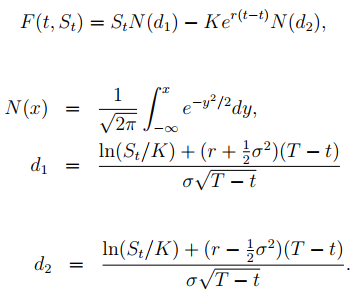
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

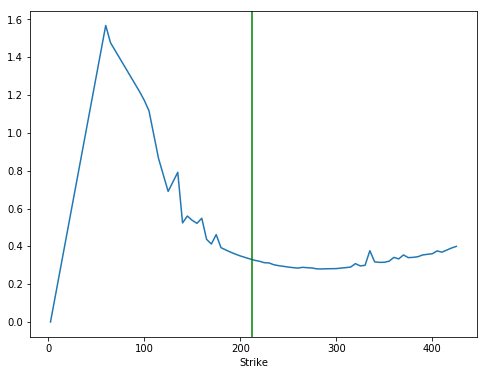

In [7]:
ax = call06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06.Underlying_Price.iloc[0], color='g');
# call06.Underlying_Price

In [8]:
put06 = aapl_opt.loc[(aapl_opt.Expiry=='2019-04-18') & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
22,50.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:46,"{'contractSymbol': 'AAPL190418P00050000', 'str..."
27,55.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:46,"{'contractSymbol': 'AAPL190418P00055000', 'str..."
38,65.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:46,"{'contractSymbol': 'AAPL190418P00065000', 'str..."
44,70.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:47,"{'contractSymbol': 'AAPL190418P00070000', 'str..."
55,80.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:47,"{'contractSymbol': 'AAPL190418P00080000', 'str..."
...,...,...,...,...,...,...,...
949,300.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-08 13:45:48,"{'contractSymbol': 'AAPL190418P00300000', 'str..."
994,325.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:43,"{'contractSymbol': 'AAPL190418P00325000', 'str..."
999,330.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-09-08 03:44:29,"{'contractSymbol': 'AAPL190418P00330000', 'str..."
1026,350.0,2019-04-18,put,...,2018-10-29 20:00:01,2018-10-16 18:42:44,"{'contractSymbol': 'AAPL190418P00350000', 'str..."


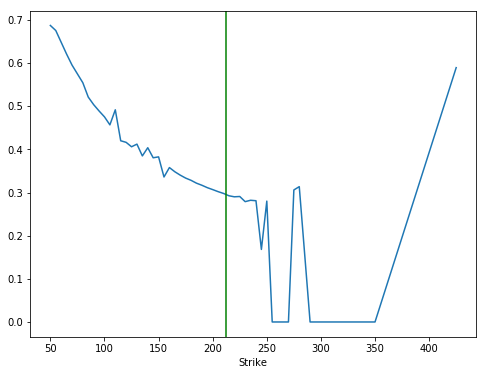

In [9]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [10]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_historical_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

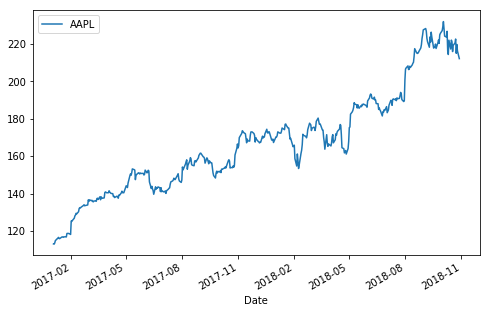

In [11]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [12]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

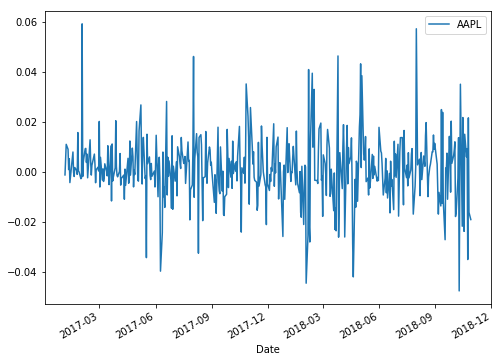

In [13]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [14]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2018-11-02,237.5,call,AAPL181102C00237500,...,2018-10-29 20:00:01,2018-10-29 19:59:21,"{'contractSymbol': 'AAPL181102C00237500', 'str..."
2018-11-02,260.0,call,AAPL181102C00260000,...,2018-10-29 20:00:01,2018-10-29 19:56:13,"{'contractSymbol': 'AAPL181102C00260000', 'str..."
2018-11-02,257.5,call,AAPL181102C00257500,...,2018-10-29 20:00:01,2018-10-29 19:50:03,"{'contractSymbol': 'AAPL181102C00257500', 'str..."
2018-11-02,192.5,call,AAPL181102C00192500,...,2018-10-29 20:00:01,2018-10-29 19:56:49,"{'contractSymbol': 'AAPL181102C00192500', 'str..."
2018-11-02,220.0,call,AAPL181102C00220000,...,2018-10-29 20:00:01,2018-10-29 19:59:57,"{'contractSymbol': 'AAPL181102C00220000', 'str..."
...,...,...,...,...,...,...,...
2021-01-15,190.0,put,AAPL210115P00190000,...,2018-10-29 20:00:01,2018-10-29 19:16:15,"{'contractSymbol': 'AAPL210115P00190000', 'str..."
2021-01-15,120.0,put,AAPL210115P00120000,...,2018-10-29 20:00:01,2018-10-29 19:00:53,"{'contractSymbol': 'AAPL210115P00120000', 'str..."
2021-01-15,220.0,put,AAPL210115P00220000,...,2018-10-29 20:00:01,2018-10-29 18:07:55,"{'contractSymbol': 'AAPL210115P00220000', 'str..."


In [15]:
aapl_opt.loc[(aapl_opt.Type=='call') & (aapl_opt.Strike==200) & (aapl_opt.Expiry=='2019-02-15')]

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
485,200.0,2019-02-15,call,...,2018-10-29 20:00:01,2018-10-29 19:55:22,"{'contractSymbol': 'AAPL190215C00200000', 'str..."


In [69]:
opcion_valuar = aapl_opt.loc[485]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215C00200000',
 'strike': 200.0,
 'currency': 'USD',
 'lastPrice': 21.85,
 'change': -2.1999989,
 'percentChange': -9.147605,
 'volume': 331,
 'openInterest': 2195,
 'bid': 21.95,
 'ask': 23.45,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1540842922,
 'impliedVolatility': 0.3687807263183594,
 'inTheMoney': True}

# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

In [17]:
# Descargamos los precios de apple
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_historical_closes(ticker, start_date,freq='d')
closes_aapl

,AAPL
Date,
2017-01-03,113.014
2017-01-04,112.887
2017-01-05,113.462
2017-01-06,114.726
2017-01-09,115.777
...,...
2018-10-23,222.730
2018-10-24,215.090
2018-10-25,219.800


- **Rendimiento Simple**

In [18]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2018-10-23,0.009
2018-10-24,-0.034
2018-10-25,0.022


In [19]:
ndays = 114
nscen = 10
dates = pd.date_range('2018-10-24', periods = ndays)
dates

DatetimeIndex(['2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
               '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02',
               ...
               '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08',
               '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12',
               '2019-02-13', '2019-02-14'],
              dtype='datetime64[ns]', length=114, freq='D')

In [20]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2018-10-24,-4.803e-03,-1.434e-02,-3.198e-03,...,-1.069e-02,8.576e-03,-8.010e-04
2018-10-25,-9.963e-05,3.355e-04,-4.101e-05,...,1.748e-04,-6.970e-05,3.352e-06
2018-10-26,-1.375e-06,-2.636e-06,5.021e-07,...,-8.515e-07,1.218e-07,-4.851e-08
2018-10-27,3.166e-08,2.166e-09,9.969e-09,...,5.375e-09,-6.169e-10,6.979e-10
2018-10-28,3.303e-10,6.670e-11,1.049e-10,...,-8.331e-11,-3.733e-13,-5.836e-12
...,...,...,...,...,...,...,...
2019-02-10,-5.253e-237,-1.835e-230,7.634e-232,...,-1.000e-243,1.014e-237,-2.490e-239
2019-02-11,-5.950e-240,-2.242e-232,1.108e-233,...,4.759e-247,1.120e-239,-5.026e-241
2019-02-12,-5.204e-242,1.052e-234,1.070e-235,...,2.305e-249,1.575e-243,3.808e-243
2019-02-13,8.760e-244,-1.598e-236,-4.017e-238,...,3.257e-251,3.036e-245,-1.773e-245


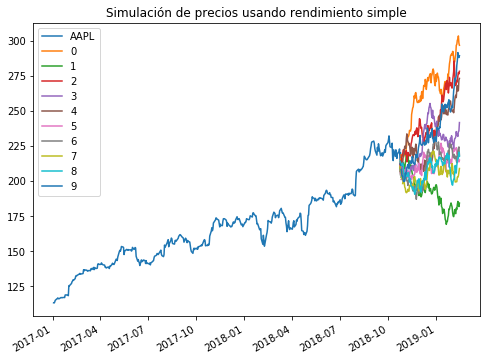

In [21]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

- **Rendimiento logarítmico**

,0,1,2,...,7,8,9
2018-10-24,-0.002,-0.022,-0.001,...,-0.012,-0.008,-6.806e-05
2018-10-25,-0.048,-0.078,-0.019,...,-0.040,-0.015,-1.922e-03
2018-10-26,-0.070,-0.084,-0.034,...,-0.042,-0.015,-2.391e-02
2018-10-27,-0.125,-0.084,-0.077,...,-0.046,-0.018,-4.500e-02
2018-10-28,-0.138,-0.183,-0.090,...,-0.070,-0.018,-5.178e-02
...,...,...,...,...,...,...,...
2019-02-10,-2.653,-1.904,-3.108,...,-1.779,-2.036,-2.668e+00
2019-02-11,-2.656,-1.941,-3.182,...,-1.779,-2.072,-2.781e+00
2019-02-12,-2.691,-1.934,-3.225,...,-1.790,-2.072,-2.768e+00
2019-02-13,-2.689,-1.926,-3.215,...,-1.835,-2.153,-2.759e+00


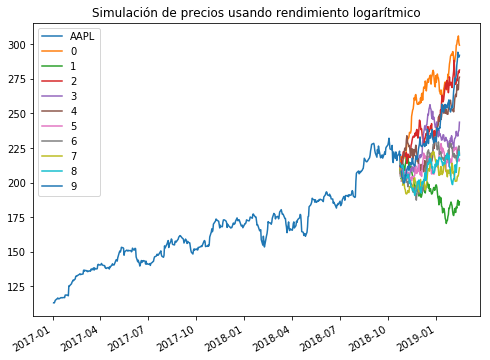

In [22]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = Ri.mean()[0]
sigma_r = Ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)
# sim_ret_ri
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');
S_T-S_T2

In [23]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.013173558363602764, 0.013173558363602764)

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [24]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0013729995076266976, 0.013131395605953805)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [25]:
# Tasa de bonos de 1 yr de fecha 10/01/18 -> 2.60%
r = 0.0260/360 # Tasa diaria

- Simularemos el tiempo de contrato (días=109) desde 24/10/18 hasta 15/02/19, 10 escenarios:
> Calculador de fechas: https://es.calcuworld.com/calendarios/calculadora-de-tiempo-entre-dos-fechas/
    
    - Generar fechas

In [26]:
ndays = 109
nscen = 10
dates = pd.date_range('2018-10-24', periods = ndays)
dates

DatetimeIndex(['2018-10-24', '2018-10-25', '2018-10-26', '2018-10-27',
               '2018-10-28', '2018-10-29', '2018-10-30', '2018-10-31',
               '2018-11-01', '2018-11-02',
               ...
               '2019-01-31', '2019-02-01', '2019-02-02', '2019-02-03',
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-09'],
              dtype='datetime64[ns]', length=109, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [27]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2018-10-24,8.754e-03,0.031,-0.024,...,0.003,0.007,-0.005
2018-10-25,2.112e-02,0.046,-0.044,...,0.011,0.006,-0.012
2018-10-26,1.323e-02,0.052,-0.024,...,0.022,0.015,-0.015
2018-10-27,2.707e-05,0.065,-0.012,...,0.043,0.017,0.001
2018-10-28,2.023e-02,0.090,0.008,...,0.036,0.023,0.002
...,...,...,...,...,...,...,...
2019-02-05,6.327e-02,-0.066,-0.065,...,-0.001,0.202,-0.005
2019-02-06,5.892e-02,-0.087,-0.062,...,-0.002,0.186,0.005
2019-02-07,5.985e-02,-0.102,-0.066,...,-0.007,0.187,0.001
2019-02-08,6.276e-02,-0.112,-0.073,...,-0.002,0.184,0.030


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [28]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2018-10-24,214.106,218.850,207.125,...,212.857,213.767,211.182
2018-10-25,216.771,222.297,203.104,...,214.643,213.454,209.706
2018-10-26,215.066,223.664,207.156,...,217.002,215.514,209.184
2018-10-27,212.246,226.481,209.758,...,221.587,215.902,212.527
2018-10-28,216.578,232.171,213.951,...,220.071,217.082,212.750
...,...,...,...,...,...,...,...
2019-02-05,226.102,198.715,198.844,...,211.946,259.818,211.103
2019-02-06,225.122,194.560,199.440,...,211.764,255.586,213.298
2019-02-07,225.331,191.718,198.625,...,210.801,255.908,212.479
2019-02-08,225.987,189.711,197.226,...,211.888,255.198,218.626


- Graficar:

In [29]:
#sim_closes.plot(figsize=(8,6));

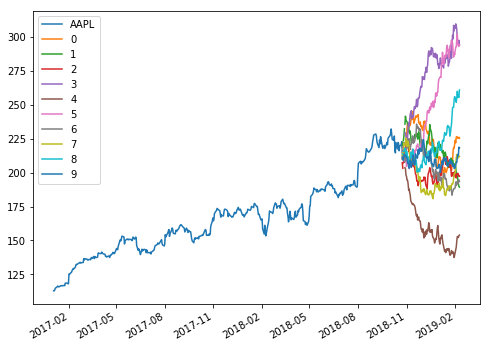

In [30]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [31]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL200619C00195000',
 'strike': 195.0,
 'currency': 'USD',
 'lastPrice': 39.73,
 'change': -4.540001,
 'percentChange': -10.255254,
 'volume': 4,
 'openInterest': 1380,
 'bid': 40.0,
 'ask': 44.5,
 'contractSize': 'REGULAR',
 'expiration': 1592524800,
 'lastTradeDate': 1540842499,
 'impliedVolatility': 0.3408116456604004,
 'inTheMoney': True}

In [32]:
K=200  # strike price
ndays = 109 
nscen = 100000
dates = pd.date_range('2018-10-29', periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

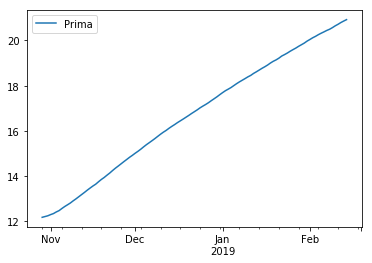

In [33]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [34]:
call.iloc[-1]

Prima    20.92
Name: 2019-02-14 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [35]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(20.67782582534784, 21.16297325105156)
(20.67782582534784, 21.16297325105156)


### Análisis de la distribución de los rendimientos

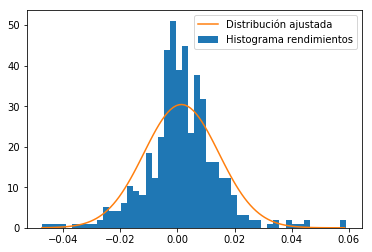

In [53]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


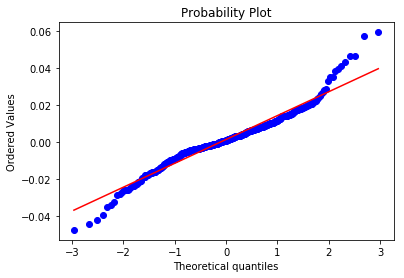

In [48]:
st.probplot(ren['AAPL'], dist='norm', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [54]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [55]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [56]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2018-10-29,5.880e-03,8.013e-03,-2.650e-03,...,-1.971e-02,2.721e-02,-6.915e-03
2018-10-30,3.747e-03,2.081e-02,-2.650e-03,...,-4.783e-03,1.615e-03,-9.048e-03
2018-10-31,-9.048e-03,-1.971e-02,-2.650e-03,...,1.615e-03,-9.048e-03,-2.650e-03
2018-11-01,-5.176e-04,1.868e-02,-1.545e-02,...,-6.915e-03,3.747e-03,5.880e-03
2018-11-02,1.615e-03,1.868e-02,-5.176e-04,...,1.868e-02,-1.331e-02,3.747e-03
...,...,...,...,...,...,...,...
2019-02-10,5.880e-03,1.441e-02,5.880e-03,...,-2.398e-02,1.228e-02,5.880e-03
2019-02-11,-1.545e-02,1.868e-02,-5.176e-04,...,4.640e-02,1.615e-03,1.015e-02
2019-02-12,1.615e-03,-2.650e-03,-2.650e-03,...,-5.176e-04,-5.176e-04,-9.048e-03
2019-02-13,1.615e-03,-5.176e-04,-9.048e-03,...,5.880e-03,3.747e-03,-5.176e-04


In [58]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2018-10-29,213.492,213.947,211.678,...,208.098,218.093,210.777
2018-10-30,214.293,218.446,211.118,...,207.105,218.446,208.879
2018-10-31,212.363,214.182,210.559,...,207.439,216.478,208.326
2018-11-01,212.253,218.220,207.332,...,206.010,217.291,209.555
2018-11-02,212.596,222.333,207.225,...,209.893,214.418,210.341
...,...,...,...,...,...,...,...
2019-02-10,261.301,257.979,245.631,...,266.933,279.755,263.540
2019-02-11,257.296,262.842,245.504,...,279.610,280.207,266.227
2019-02-12,257.712,262.147,244.854,...,279.466,280.062,263.829
2019-02-13,258.129,262.011,242.649,...,281.114,281.114,263.693


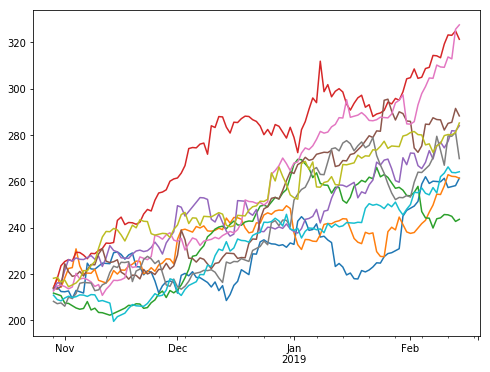

In [59]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5,1,'Simulación usando el histograma de los rendimientos')

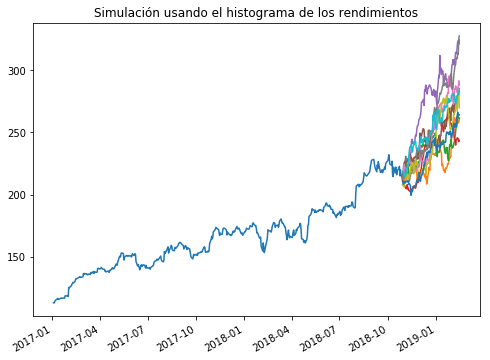

In [62]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [64]:
K=200
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

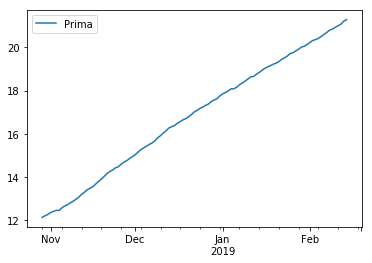

In [65]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [66]:
call_hist.iloc[-1]

Prima    21.272
Name: 2019-02-14 00:00:00, dtype: float64

In [70]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL190215C00200000',
 'strike': 200.0,
 'currency': 'USD',
 'lastPrice': 21.85,
 'change': -2.1999989,
 'percentChange': -9.147605,
 'volume': 331,
 'openInterest': 2195,
 'bid': 21.95,
 'ask': 23.45,
 'contractSize': 'REGULAR',
 'expiration': 1550188800,
 'lastTradeDate': 1540842922,
 'impliedVolatility': 0.3687807263183594,
 'inTheMoney': True}

Intervalo de confianza del 95%

In [67]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(20.691462641645206, 21.853006932164316)
(20.691462641645206, 21.853006932164316)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>